# Tensors introduction
One of the data types introduced by most deep learning frameworks such as Tensorflow or PyTorch is the **tensor**.  
  
From a Computer Science perspective tensors are multi-dimensional arrays plus a number of basic operations on them that have turned out to be very useful in a lot of applications.

A tensor is nearly the same thing as a NumPy array, but with an additional restriction that unlocks some additional capabilities. It's the same in that it, too, is a multidimensional table of data, with all items of the same type. However, the restriction is that a tensor cannot use just any type — it has to use a single basic numeric type for all components. For example, a PyTorch tensor cannot be jagged. It is always a regularly shaped multidimensional rectangular structure.  
  
One major capability is that these structures can live on the GPU, in which case their computation will be optimized for the GPU and can run much faster.  
In this sense, PyTorch or Tensorflow can be seen as a replacement for NumPy to use the power of GPUs.  
  
PyTorch interface has been created to be as much as possible similar to the Numpy's one. Let's see more in details what are the tensors (specifically the PyTorch tensors) and the similarities with the NumPy arrays.  

In [1]:
import numpy as np

In [2]:
import torch
print(torch.__version__)

2.0.1


you can check whether your installation recognizes your built-in NVIDIA GPU by running the following code in Python:


In [3]:
torch.cuda.is_available()

False

## Tensor creation
A NumPy array is a multidimensional table of data, with all items of the same type.  
 By "multidimensional table" we mean, for instance, a list (dimension of one), a table or matrix (dimension of two), a "table of tables" or "cube" (dimension of three), and so forth. If the items are all of some simple type such as integer or float, then NumPy will store them as a compact C data structure in memory. This is where NumPy shines. NumPy has a wide variety of operators and methods that can run computations on these compact structures at the same speed as optimized C, because they are written in optimized C.  
  
Tensors are simply regularly shaped arrays—for example, a matrix. Matrices have rows and columns; we call these the axes or dimensions. The number of dimensions of a tensor is its rank:
  
Rank zero: scalar  
Rank one: vector  
Rank two: matrix  
  
To create a tensor - same way as for an array - pass a list (or list of lists, or list of lists of lists, etc.) to tensor():  


In [4]:
# create a 0D tensor (scalar) from a Python integer
tensor0d = torch.tensor(1)
tensor0d

tensor(1)

A one dimension tensor is basically like a numpy array:

In [5]:
# create a 1D tensor (vector) from a Python list
tensor1d = torch.tensor([1, 2, 3])

tensor1d

tensor([1, 2, 3])

In [6]:
simple_array = np.array ([1,2,3]) # NumPy array
simple_array

array([1, 2, 3])

In [7]:
tensor1d == simple_array  # still they are different data structures

False

The types are different: 

In [8]:
print(f"Array Type: {type(simple_array)}") # type
print(f"Array data type: {simple_array.dtype}") 
print(f"Array Shape: {np.shape(simple_array)}") # shape

Array Type: <class 'numpy.ndarray'>
Array data type: int64
Array Shape: (3,)


In [9]:
print(f"Tensor Type: {tensor1d.type()}") # type
print(f"Tensor data type: {tensor1d.dtype}") 
print(f"Tensor Shape: {tensor1d.shape}") # shape

Tensor Type: torch.LongTensor
Tensor data type: torch.int64
Tensor Shape: torch.Size([3])


And a rank two tensor is like a numpy matrix:

In [10]:
# create a 2D tensor from a nested Python list
tensor2d = torch.tensor([[1, 2], [3, 4]])
tensor2d

tensor([[1, 2],
        [3, 4]])

In [12]:
    # NumPy matrix
matrix = np.array ([[1, 2], [3, 4]])
matrix

array([[1, 2],
       [3, 4]])

### Difference in creation type
Note that there is a difference in the creation API *tensor* versus *Tensor*.  
A tensor infers the dtype automatically, while torch.Tensor (note the capital letter) returns an empty tensor without any data, and if you pass some data, it will convert into a torch.FloatTensor

In [13]:
data = [[1,2,3],[4,5,6]] # a list of lists

    # create a 3D tensor from a nested Python list
tensorAsInt = torch.tensor(data)
tensorAsInt

tensor([[1, 2, 3],
        [4, 5, 6]])

In [14]:
tensorAsFloat = torch.Tensor(data)
tensorAsFloat

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [15]:
tensorWithoutData = torch.Tensor()
tensorWithoutData

tensor([])

torch.tensor is simply a better API and has an optional parameter to change the dtype  
  
### Create from array
I can also create a tensor from a numpy array:

In [16]:
data = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
# create a 3D tensor from a nested Python list
tensor3d_A = torch.tensor(data)

# create a 3D tensor from NumPy array
ary3d = np.array(data)
tensor3d_B = torch.tensor(ary3d)  # Copies NumPy array

In [17]:
tensor3d_A

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [18]:
tensor3d_B

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [19]:
tensor3d_A == tensor3d_B

tensor([[[True, True],
         [True, True]],

        [[True, True],
         [True, True]]])

## Conversion array - tensor
It is possible to convert from array to tensors and viceversa:

In [20]:
# random numpy array
array = np.random.rand(2,2)
print(f"{type(array)} {array}\n")

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print(f"{from_numpy_to_tensor}\n")

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print(f"{type(from_tensor_to_numpy)} {from_tensor_to_numpy}\n")

<class 'numpy.ndarray'> [[0.9453812  0.71919377]
 [0.21445788 0.80011854]]

tensor([[0.9454, 0.7192],
        [0.2145, 0.8001]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.9453812  0.71919377]
 [0.21445788 0.80011854]]



In [21]:
data = [[1,2,3],[4,5,6]] # a list of lists

    # create a 3D tensor from a nested Python list
tensor3d = torch.tensor(data)
tensor3d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [22]:
matrix = np.array (data)


In [23]:
z = torch.from_numpy(matrix).float() + tensor3d # Il risultato è un tensore PyTorch a 32 bit
z


tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

But be careful because the space is shared:

In [24]:
zz = z.numpy()  # I copy z into zz
zz += 1.0       # I modify zz
print(z)

tensor([[ 3.,  5.,  7.],
        [ 9., 11., 13.]])


Now z has also been modified!  
Another example:

In [25]:
ary3d

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [26]:
tensor3d_B  # remember it was directly created from ary3d but not using from_numpy

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [27]:
tensor3d_C = torch.from_numpy(ary3d)  # Shares memory with NumPy array ary3d
tensor3d_C

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [28]:
ary3d[0, 0, 0] = 999  # I change one item of ary3d
print(tensor3d_B) # remains unchanged


tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [29]:
print(tensor3d_C) # changes because of memory sharing


tensor([[[999,   2],
         [  3,   4]],

        [[  5,   6],
         [  7,   8]]])


In [30]:
print(tensor3d_B)  # still the same

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


## Allocation
Tensors can be allocated like a Numpy array, using a tuple for the size (height, width):  

In [31]:
# numpy ones
x = np.ones((2,3))  # allocates a 2 by 3 space full of 1s
print(f"Numpy: {x}\n")

# pytorch ones
y = torch.ones((2,3))
print(y)

Numpy: [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


One small difference is that tensors can be created also passing directly the dimensions, without using a tuple:

In [32]:
print(torch.zeros(2,3))  # allocates space of 0s, note the tuple's missing brackets

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [33]:
# numpy random
print(f"Numpy: {np.random.rand(2,3)}\n")

# pytorch random
print(torch.rand(2,3)) # allocates space of random numbers

Numpy: [[0.1517801  0.0091318  0.01086989]
 [0.78558256 0.32190496 0.98464505]]

tensor([[0.5834, 0.9540, 0.8295],
        [0.5903, 0.3031, 0.1845]])


## Indexing
All the operations that follow are shown on tensors, but the syntax and results for NumPy arrays is identical. 

In [34]:
tensor3d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [35]:
tensor3d[1] # the second row (index starts from zero)

tensor([4, 5, 6])

In [36]:
tensor3d[:,1] # : means all of the first axis, so it shows the second column

tensor([2, 5])

In [37]:
tensor3d[1,1:3] # second row, second and third column

tensor([5, 6])

## Basic math with tensors

On tensors you can use the standard operators such as +, -, *, /:

In [38]:
tensor3d+1  # add 1 to each scalar inside the tensor


tensor([[2, 3, 4],
        [5, 6, 7]])

You can also apply operators between tensors:

In [39]:
# create tensor 
tensor1 = torch.ones(3,3)
print("\n",tensor1)


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [40]:
# Resize
print(f"shape: {tensor1.view(9).shape}; items: {tensor1.view(9)}\n")

shape: torch.Size([9]); items: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])



In [41]:
# Addition
tensor2 = tensor1.add(tensor1)
print(f"Addition: {tensor2}\n")

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])



In [42]:
# Subtraction
print(f"Subtraction: {tensor1.sub(tensor1)}\n")

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])



In [43]:
# Element wise multiplication
print(f"Element wise multiplication: {torch.mul(tensor1, tensor2)}\n")

Element wise multiplication: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])



In [44]:
# Element wise division
print(f"Element wise division: {torch.div(tensor1, tensor2)}\n")

Element wise division: tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])



In [45]:
# Mean
tensor = torch.Tensor([1,2,3,4,5])
print(f"Mean: {tensor.mean()}")

# Standart deviation (std)
print(f"std: {tensor.std()}")

Mean: 3.0
std: 1.5811388492584229


### Broadcasting
The magic trick is that PyTorch, when it tries to perform a simple operation between two tensors of different ranks, will use **broadcasting**.  
 That is, it will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank.  
 Broadcasting is an important capability that makes tensor code much easier to write but also more performant (PyTorch doesn't actually copy n times. It pretends it were a tensor of that shape, but doesn't actually allocate any additional memory).  
It does the whole calculation in C (or, if you're using a GPU, in CUDA), tens of thousands of times faster than pure Python (up to millions of times faster on a GPU!).  
This is true of all broadcasting and elementwise operations and functions done in PyTorch.  

For instance:

In [46]:
torch.tensor([1,2,3]) + torch.tensor(1)


tensor([2, 3, 4])

In [47]:
time = torch.arange(0,20).float(); time


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [48]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

In [49]:
speed

tensor([71.1070, 58.1938, 41.3292, 34.8614, 22.5767, 15.1346,  9.0774,  3.6245,
         6.9678, -5.5598,  1.1083,  4.8711,  5.9930,  7.2402, 21.1984, 25.3632,
        31.1512, 44.7718, 59.2238, 74.2146])

## Common operations
It's also possible to transpose tensors and to multiply matrices:

In [50]:
tensor2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor2d


tensor([[1, 2, 3],
        [4, 5, 6]])

In [51]:
tensor2d.shape


torch.Size([2, 3])

In [52]:
tensor2d.T # transpose = rows exchanged with columns

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [53]:
tensor2d.matmul(tensor2d.T) # matrix multiplication 

tensor([[14, 32],
        [32, 77]])

In [54]:
tensor2d @ tensor2d.T  # the operator @ is for matrix multiplication

tensor([[14, 32],
        [32, 77]])

In [55]:
tensor2d.view(3, 2)


tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [56]:
tensor2d.reshape(3, 2)


tensor([[1, 2],
        [3, 4],
        [5, 6]])

## Gradient
pytorch is used in neural network and as you know, in neural network we have backpropagation where gradients are calculated. Therefore it makes sense that tensors can  handle gradients. 

In [57]:
xt = torch.tensor(3.).requires_grad_()

The special method is the magical incantation used to tell PyTorch that we want to calculate gradients with respect to that variable at that value. It is essentially tagging the variable, so PyTorch will remember to keep track of how to compute gradients of the other, direct calculations on it that you will ask for.  
  
  For example, let's define a function that calculates the square of a variable:

In [58]:
print(xt.data) # just the tensor
print(xt.grad) # the gradient, initially equal to None
print(xt.grad_fn) # the computational graph, initially equal to None

tensor(3.)
None
None


In [59]:
def f(x): return x**2  # the function calculating the square

In [60]:
f(3)  # 3 squared is 9

9

In [61]:
yt=f(xt)  

In [62]:
yt.backward()
xt.grad

tensor(6.)

If you remember calculus rules, the derivative of x^2 is 2x, and we have x=3, so the gradients should be 2 \* 3 = 6, which is what PyTorch calculated for us!  
This can be applied to higher rank tensors:  

In [63]:
xtB = torch.tensor([3.,4.,10.]).requires_grad_()
xtB

tensor([ 3.,  4., 10.], requires_grad=True)

In [64]:
def f(x): return (x**2).sum()  # add sum, to return a scalar

ytB = f(xtB)
ytB

tensor(125., grad_fn=<SumBackward0>)

In [65]:
ytB.backward()
xtB.grad

tensor([ 6.,  8., 20.])

Our gradients are 2 \* xt (i.e., the derivative), as we'd expect!


### Use gradient for simple linear regression
Firstly we define a random array of 30 number (input and label) which follow a trend:

In [66]:
# linear regression example
X = np.random.rand(30, 1)*2.0
w = np.random.rand(2, 1)
y = X*w[0] + w[1] + np.random.randn(30, 1) * 0.05

Then we prepare a simple linear regression model: 

In [67]:
W = torch.rand(1, 1, requires_grad=True) # initialise weights and bias
b = torch.rand(1, requires_grad=True)

def linear(x):
  return torch.matmul(x, W) + b  # a classic linear regression formula


Random data is transformed into tensors, then weight and bias are trained (for 2500 epochs): 

In [68]:
Xt = torch.from_numpy(X).float()  # transform into tensors
yt = torch.from_numpy(y).float()

for epoch in range(2500):

  # predictions
  y_pred = linear(Xt)

  # calculates the loss function: mean square error 
  loss = torch.mean((y_pred - yt) ** 2)

  #  back-propagation
  loss.backward()

  # Updates the weights
  W.data = W.data - 0.005*W.grad.data # work on .data and not W/b directly, not to overwrite original tensors
  b.data = b.data - 0.005*b.grad.data

  #  gradient reset
  W.grad.data.zero_()
  b.grad.data.zero_()


And we plot the results: 

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

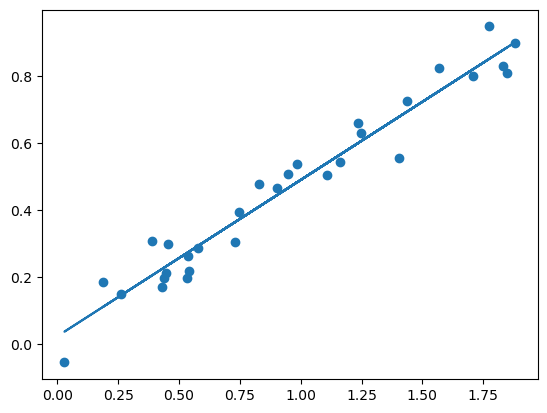

In [71]:
plt.scatter(X, y)
plt.plot(Xt,y_pred.detach().numpy());

## Use GPU
Finally, let's see how to use the GPU to accelerate computation.  
PyTorch comes already with support for GPU so nothing extra to be installed.  
It offers a function to detect if CUDA or MPS is available on the system.  
CUDA is Nvidia's language framework for GPU and MPS is the Apple’s Metal Performance Shaders (MPS) which can be used as a backend for PyTorch accelerated training too.  
If no GPU, no MPS is available, then device will be set to CPU.

In [72]:
myDevice = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {myDevice} device")

Using mps device


When using an expensive tensor operation (typically training a neural network), you simply pass an optional argument saying which device to use:

In [73]:
# Create a Tensor directly on the mps device
x = torch.ones(5, device=myDevice)

    # Any operation happens on the device (in this case on MPS)
y = x * 2
y

tensor([2., 2., 2., 2., 2.], device='mps:0')

Let's quantify the time gain when using a GPU.  
We create 1000 random tensors and multiply them.

In [74]:
def create_torch_tensors(device):
    x = torch.rand((10000, 10000), dtype=torch.float32)
    y = torch.rand((10000, 10000), dtype=torch.float32)
    x = x.to(device)
    y = y.to(device)

    print("tensors created in ", device)
    return x, y


In [75]:
# how long does it take on MPS?
x, y = create_torch_tensors(myDevice)

tensors created in  mps


In [76]:
%%timeit
x * y

22.3 ms ± 606 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [77]:
# how long does it take on CPU?
x, y = create_torch_tensors("cpu")

tensors created in  cpu


In [78]:
%%timeit
x * y

33.2 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


It takes half time on MPS (Apple silicon M1), would be even better, around a quarter on M3 and of course if you have an Nvidia GPU.